In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df = pd.DataFrame()

In [101]:
tickers = ['PG', 'WMT', 'JPM', 'FB', '^GSPC']

In [102]:
for t in tickers:
    df[t] = web.DataReader(t, 'yahoo', '2013-1-1')['Adj Close']

In [106]:
df.head()

,PG,WMT,JPM,FB,^GSPC
Date,,,,,
2013-01-02,56.073479,58.437824,37.421028,28.000000,1462.420044
2013-01-03,55.717930,58.066463,37.345623,27.770000,1459.369995
2013-01-04,55.831051,58.285896,38.007561,28.760000,1466.469971
2013-01-07,55.451244,57.728874,38.049461,29.420000,1461.890015
2013-01-08,55.362358,57.889198,38.124874,29.059999,1457.150024


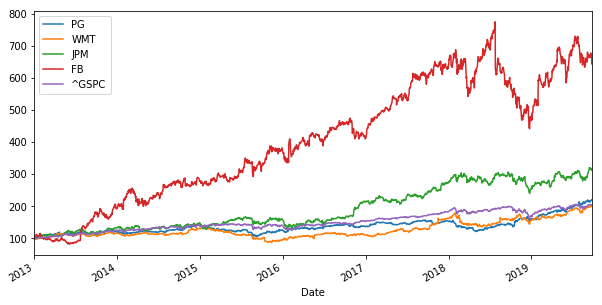

In [104]:
(df / df.iloc[0] * 100).plot(figsize=(10,5))

In [107]:
log_returns.mean() * 250

PG       0.117421
WMT      0.104021
JPM      0.168171
FB       0.274537
^GSPC    0.104872
dtype: float64

In [108]:
log_returns.corr()

,PG,WMT,JPM,FB,^GSPC
PG,1.000000,0.381093,0.289752,0.144657,0.492567
WMT,0.381093,1.000000,0.278959,0.118303,0.432158
JPM,0.289752,0.278959,1.000000,0.295439,0.744915
FB,0.144657,0.118303,0.295439,1.000000,0.488098
^GSPC,0.492567,0.432158,0.744915,0.488098,1.000000


In [109]:
log_returns.cov() * 250

,PG,WMT,JPM,FB,^GSPC
PG,0.022705,0.010355,0.008884,0.007049,0.009568
WMT,0.010355,0.032518,0.010236,0.006899,0.010047
JPM,0.008884,0.010236,0.041402,0.019441,0.019540
FB,0.007049,0.006899,0.019441,0.104590,0.020350
^GSPC,0.009568,0.010047,0.019540,0.020350,0.016620


In [110]:
log_returns.var() * 250

PG       0.022705
WMT      0.032518
JPM      0.041402
FB       0.104590
^GSPC    0.016620
dtype: float64

In [111]:
portfolio_cov = log_returns.cov() * 250

In [112]:
porftolio_var = log_returns.var() * 250

In [113]:
beta = (portfolio_cov /  porftolio_var[-1]).iloc[-1,:-1]

In [114]:
beta

PG     0.575729
WMT    0.604500
JPM    1.175724
FB     1.224450
Name: ^GSPC, dtype: float64

In [121]:
risk_free = .017
hist_returns = .05

In [151]:
CAPM = risk_free + beta * (hist_returns - risk_free)

In [152]:
CAPM

PG     0.035999
WMT    0.036949
JPM    0.055799
FB     0.057407
Name: ^GSPC, dtype: float64

In [153]:
sharpe = (CAPM - risk_free) / (log_returns.std() * 250 ** .5)

In [143]:
sharpe

FB       0.124942
JPM      0.190682
PG       0.126086
WMT      0.110623
^GSPC         NaN
dtype: float64

In [115]:
num_assets = len(tickers)

In [116]:
p_returns = []
p_vol = []

for i in range(5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_returns.append(np.sum(weights * log_returns.mean()) * 250)
    p_vol.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

In [117]:
p_returns = np.array(p_returns)
p_vol = np.array(p_vol)

In [118]:
portfolios = pd.DataFrame({'Return': p_returns, 'Volatility': p_vol})

Text(0, 0.5, 'Expected Returns')

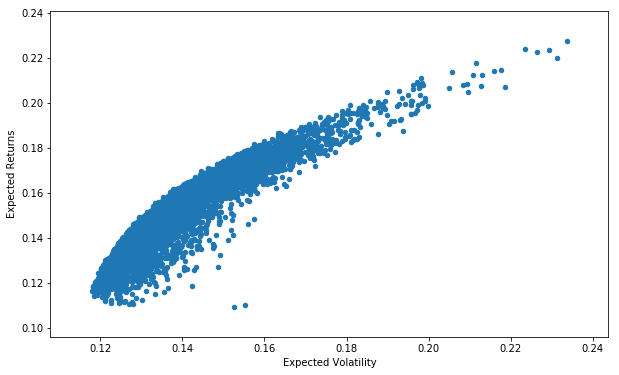

In [119]:
portfolios.plot(y='Return', x='Volatility', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')